In [1]:
import numpy as np
import sys
import time
import random
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

sys.path.append('/home/kaliayev/Documents/ENSAE/elements_logiciels/word2vec_eltdm')

%load_ext autoreload
%autoreload 2

In [2]:
from word2vec_eltdm.common import Tokenizer, VocabCreator, DataLoader, TokenCleaner, Preprocessor, Subsampler, evaluate
from word2vec_eltdm.word2vec_accelerated import PytorchSimpleWord2Vec, train_default, update_best_loss

## Get data and create vocab

In [3]:
datapath = "../data/text8.txt"

RATIO = 0.01
tokenizer = Tokenizer(datapath)
token_cleaner = TokenCleaner(freq_threshold=5)
vocab_creator = VocabCreator()
text8_dataset = Preprocessor(tokenizer, token_cleaner, vocab_creator, RATIO).preprocess()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
print("Size of our vocabulary:", len(text8_dataset.tokens_to_id))

Size of our vocabulary: 3269


In [5]:
print("Number of tokens in our train dataset:", len(text8_dataset.train_tokens))

Number of tokens in our train dataset: 82228


In [6]:
print("Number of tokens in our val dataset:", len(text8_dataset.val_tokens))

Number of tokens in our val dataset: 0


In [7]:
print("Number of tokens in our test dataset:", len(text8_dataset.test_tokens))

Number of tokens in our test dataset: 0


## Subsampling of frequent words, as in Mikolov 2013.

In [8]:
subsampler = Subsampler(text8_dataset.train_tokens)
text8_dataset.train_tokens, text8_dataset.frequencies = subsampler.subsample()

In [9]:
print("Size of our vocabulary after subsampling of frequent words, for train:", len(text8_dataset.tokens_to_id))

Size of our vocabulary after subsampling of frequent words, for train: 3269


In [10]:
print("Number of tokens in train dataset:", len(text8_dataset.train_tokens))

Number of tokens in train dataset: 12529


## DataLoader

In [11]:
window = 5
batch_size = 512
train_dataloader = DataLoader(text8_dataset, text8_dataset.train_tokens, window, batch_size)
val_dataloader = DataLoader(text8_dataset, text8_dataset.val_tokens, window, batch_size)
test_dataloader = DataLoader(text8_dataset, text8_dataset.test_tokens, window, batch_size)

## Model

In [12]:
# defining the parameters
len_vocab = len(text8_dataset.tokens_to_id)
embedding_size = 300
learning_rate = 0.003

# instantiate the model
model = PytorchSimpleWord2Vec(
    len_vocab,
    embedding_size
).to(device)
model.initialize_weights()


# using the loss that we defined
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Training

In [13]:
# train for some number of epochs
epochs = 5
train_loss_history = []
tbar = trange(epochs)

for epoch in tbar:
    print(f"###################### EPOCH {epoch} ###########################")
    
    train_loss = train_default(model, train_dataloader, criterion, optimizer)
    print("Training loss:", train_loss.item())
    train_loss_history.append(train_loss.item())
    
    # Keep track of the best model
    update_best_loss(model, train_loss)
    
    embeddings = model.embedding.weight.data.detach().numpy()
    evaluate(embeddings, text8_dataset.id_to_tokens, nb_words=20)

  0%|          | 0/5 [00:00<?, ?it/s]

###################### EPOCH 0 ###########################


  0%|          | 0/25 [00:00<?, ?it/s]

Current Training Loss 8.09248
Training loss: 8.092293739318848
Now best model has 8.092293739318848 loss
Saving model
seven | crop, georgia, classified, drawn, heroes
b | average, alan, diagnostic, class, educated
th | rain, leads, poor, egoism, benjamin
since | cure, carl, angles, destroy, may
anchorage | races, speed, experimental, accounts, proclamation
america | ceremony, huge, evolution, questions, achievement
culture | solely, service, hermetical, damage, party
groups | identify, negative, thousands, per, nuclear
called | away, ethics, usage, oracle, removal
later | houses, trucial, controversy, mental, feelings
program | producers, prize, majority, saharan, agreement
truth | council, movie, proudhon, fully, spread
married | enemies, issued, mention, surrounded, principle
reading | newman, stamps, human, mainly, mere
mines | tunisia, buried, admetus, contiguous, pass
clear | keep, efforts, anarchists, transport, surveillance
efforts | clear, plus, rothbard, essential, leading
oxy

  0%|          | 0/25 [00:00<?, ?it/s]

Current Training Loss 8.09129
Training loss: 8.089818954467773
Now best model has 8.089818954467773 loss
Saving model
would | models, book, arts, meaning, marked
often | five, societies, animated, source, broader
anchorage | races, speed, experimental, accounts, proclamation
gore | principles, parts, claim, slam, attributed
five | double, jewish, often, understanding, producers
however | instance, rational, prefer, per, lives
taggart | sought, york, vowel, ethical, anthropology
seven | georgia, crop, classified, heroes, drawn
us | genetic, bay, composition, contain, track
years | ship, main, numerous, criticisms, communicate
freedom | multiple, al, rett, raising, ca
awareness | struck, calling, irrigation, string, system
examples | men, altruistic, relevant, robert, sounds
developmental | brought, land, concern, look, propane
slave | must, secure, similarities, taken, exception
lives | resulted, mercury, extensively, moment, almost
signed | emirates, frequently, angeles, plans, myths
i

  0%|          | 0/25 [00:00<?, ?it/s]

Current Training Loss 8.08829
Training loss: 8.085267066955566
Now best model has 8.085267066955566 loss
Saving model
time | significant, australian, personal, threat, however
anthropology | challenge, reason, completely, taggart, added
would | models, arts, book, meaning, marked
general | paid, captured, invasion, wealth, campaign
best | frederick, associated, protest, captured, light
seven | georgia, crop, classified, drawn, decades
well | follows, received, job, bishop, locations
see | bar, national, emphasis, traditional, bringing
language | mexican, compatibility, historical, emotional, job
human | reading, stop, hope, appropriate, charity
increasing | historic, characteristics, talk, version, hidden
birth | half, ore, law, disease, edward
conditions | amount, contiguous, mixture, criticism, questions
product | improvements, long, tis, mode, proposed
rebellion | wyatt, performing, presidential, guilty, theme
highest | sample, interested, opponents, fao, transport
ages | making, pl

  0%|          | 0/25 [00:00<?, ?it/s]

Current Training Loss 8.08262
Training loss: 8.081289291381836
Now best model has 8.081289291381836 loss
Saving model
system | embraced, meeting, spanish, announced, similarities
since | cure, carl, angles, destroy, may
south | implementation, modes, descendants, collective, speaking
c | nation, afc, topic, norway, computers
also | expensive, telephus, seward, fourth, violent
would | models, arts, book, meaning, marked
general | paid, captured, invasion, wealth, campaign
b | average, alan, class, diagnostic, educated
modern | oscars, africa, factors, compare, nicomachean
world | oscar, devoted, situations, decide, mexican
married | enemies, ion, issued, mention, nature
actions | chapter, temperatures, corruption, revolutionary, carbon
basic | wrote, shrugged, along, topics, ellis
easily | mexican, seward, sheikh, historical, arid
truth | council, movie, proudhon, fully, spread
reading | newman, stamps, human, mere, mainly
thomas | meet, bank, occurred, anthropology, special
studied | s

  0%|          | 0/25 [00:00<?, ?it/s]

Current Training Loss 8.07942
Training loss: 8.078763008117676
Now best model has 8.078763008117676 loss
Saving model
taggart | sought, york, ethical, vowel, anthropology
used | grain, account, san, intent, uae
seven | georgia, crop, classified, motor, drawn
th | poor, egoism, leads, sub, attempt
like | concept, city, nd, literacy, artists
anarchism | team, diverse, passage, included, ethiopia
social | heavy, bound, branch, shrugged, indeed
called | away, oracle, petroleum, sovereignty, ethics
number | deaf, required, smaller, somewhat, global
world | oscar, devoted, situations, decide, mexican
anthropological | prefix, sp, separated, soon, better
ha | congo, front, expression, england, berbers
freedom | multiple, intended, rett, ca, al
product | improvements, long, tis, mode, proposed
soul | patroclus, resistance, feelings, dissociation, seriously
market | structures, may, victim, pig, sex
approach | films, reach, agricultural, four, regard
clear | efforts, keep, transport, anarchists

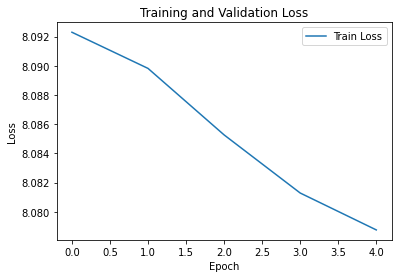

In [14]:
plt.plot(train_loss_history, label = "Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.title('Training and Validation Loss')
plt.show() 